## Task 2 EDA

#### Loading the library

In [16]:
using DataFrames
using UrlDownload
using DataFramesMeta
using Statistics
using DataSkimmer
using CSV
using Pkg
using Plots
using Gadfly
using FreqTables
using StatsBase
using Dates
using Pipe

#### Loading the Data

In [6]:
trainingData = DataFrame(urldownload("https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044685365/client_data.csv"))

pricingData = DataFrame(urldownload("https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044717433/price_data.csv"))

,id,price_date,price_off_peak_var,price_peak_var
,String,Date,Float64,Float64
1,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0
2,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0
3,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0
4,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0
5,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0
6,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0
7,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0
8,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0
9,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.0


In [7]:
(skim(trainingData))

┌─────────────────────┬─────────────────────────────┐
│                Type │ DataFrameColumns{DataFrame} │
│             N. rows │                       14606 │
│             N. cols │                          26 │
│     N. numeric cols │                          18 │
│ N. categorical cols │                           4 │
│    N. datetime cols │                           4 │
│  N. allmissing cols │                           0 │
└─────────────────────┴─────────────────────────────┘

18 numeric columns
┌────────────────────────────────┬─────────┬──────────┬──────────┬───────────┬──
│                           Name │    Type │ Missings │ Complete │      Mean │ ⋯
├────────────────────────────────┼─────────┼──────────┼──────────┼───────────┼──
│                       cons_12m │   Int64 │        0 │   100.0% │ 159220.29 │ ⋯
│                   cons_gas_12m │   Int64 │        0 │   100.0% │  28092.38 │ ⋯
│                cons_last_month │   Int64 │        0 │   100.0% │  16090.27 │ ⋯
│       

##### Some important pointers from the client dataset:

- The average subscribed power : 13.86 units (median, because the data is skewed)
- The average year of a client : 5 years
- Number of Sales Channels     : 8
- Number Sales Campaign        : 6 

In [8]:
print(skim(pricingData))

┌─────────────────────┬─────────────────────────────┐
│                Type │ DataFrameColumns{DataFrame} │
│             N. rows │                      193002 │
│             N. cols │                           8 │
│     N. numeric cols │                           6 │
│ N. categorical cols │                           1 │
│    N. datetime cols │                           1 │
│  N. allmissing cols │                           0 │
└─────────────────────┴─────────────────────────────┘

6 numeric columns
┌────────────────────┬─────────┬──────────┬──────────┬───────┬───────┬──────┬───────┬───────┬───────┐
│               Name │    Type │ Missings │ Complete │  Mean │  Std. │ Min. │  Med. │  Max. │ Hist. │
├────────────────────┼─────────┼──────────┼──────────┼───────┼───────┼──────┼───────┼───────┼───────┤
│ price_off_peak_var │ Float64 │        0 │   100.0% │  0.14 │  0.03 │ 0.00 │  0.15 │  0.28 │ ▁▁▇▁▁ │
│     price_peak_var │ Float64 │        0 │   100.0% │  0.05 │  0.05 │ 0.00 │  0.09 │  

Since we will extensively be looking at the price data later, we could get quick glimpse of the same.

#### Energy Price

- The average Energy price during off peak : 0.14 (1st period)
- The average Energy price during peak     : 0.05 (2nd period)
- The average Energy price during mid peak : 0.03 (3rd period)

#### Power Price

- The average Power price during off peak : 43.33 (1st period)
- The average Power price during peak     : 10.62 (2nd period)
- The average Power price during mid peak : 6.41  (3rd period)


The Pricing data seemed be to recorded for the year 2015, from Jan to December. 

The columns in both the datasets have no missing values, Hence we would not be dealing with handling missing values. 

We would proceed with look at the integrity of the data provided. 

In [9]:
ENV["COLUMNS"] = 1000 # setting option to show all the columns

1000

#### A Look into the target variable

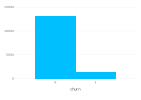

In [10]:
Gadfly.plot(trainingData, x = :churn, Geom.histogram, 
    Scale.x_discrete(levels=[0,1]), Scale.y_continuous(format=:plain))

There's a great amount imbalance in the target variable. We would be required to Oversample the minority class. 

In [11]:
trainingHasGas = countmap(trainingData.has_gas)

Dict{String1, Int64} with 2 entries:
  "f" => 11955
  "t" => 2651

In [12]:
k = keys(trainingHasGas)

KeySet for a Dict{String1, Int64} with 2 entries. Keys:
  "f"
  "t"

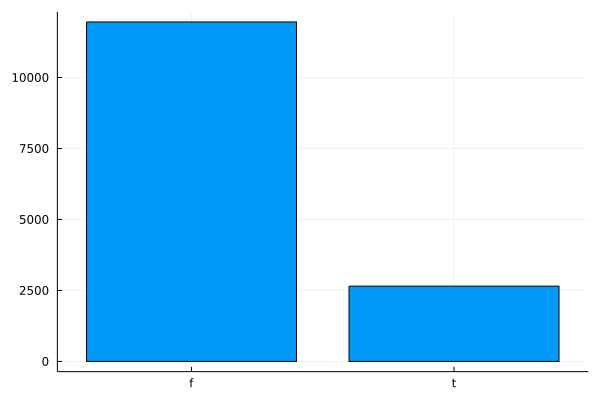

In [117]:
bar((x -> trainingHasGas[x]).(k),xticks=(1:2, k),
legend = false)

In [18]:
freqtable(trainingData.has_gas, trainingData.churn)

2×2 Named Matrix{Int64}
Dim1 ╲ Dim2 │     0      1
────────────┼─────────────
"f"         │ 10753   1202
"t"         │  2434    217

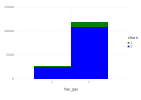

In [19]:
Gadfly.plot(trainingData, x = :has_gas, Geom.histogram, color = :churn,
    Scale.color_discrete_manual(colorant"green",colorant"blue"),
    Scale.y_continuous(format=:plain))

In [20]:
freqtable(trainingData.channel_sales, trainingData.churn)

8×2 Named Matrix{Int64}
                     Dim1 ╲ Dim2 │    0     1
─────────────────────────────────┼───────────
MISSING                          │ 3442   283
epumfxlbckeskwekxbiuasklxalciiuu │    3     0
ewpakwlliwisiwduibdlfmalxowmwpci │  818    75
fixdbufsefwooaasfcxdxadsiekoceaa │    2     0
foosdfpfkusacimwkcsosbicdxkicaua │ 5934   820
lmkebamcaaclubfxadlmueccxoimlema │ 1740   103
sddiedcslfslkckwlfkdpoeeailfpeds │   11     0
usilxuppasemubllopkaafesmlibmsdf │ 1237   138

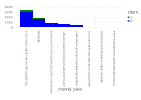

In [21]:
Gadfly.plot(trainingData, x= :channel_sales, Geom.histogram,
    color = :churn,
    Scale.color_discrete_manual(colorant"green",colorant"blue"),
    Scale.y_continuous(format=:plain))

MISSING entry seems to have a significant amount of entries hence we can't just simply remove the values as missing values. We would be needed to contact our client for more details

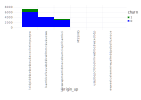

In [22]:
Gadfly.plot(trainingData, x= :origin_up, Geom.histogram,
    color = :churn,
    Scale.color_discrete_manual(colorant"green",colorant"blue"),
    Scale.y_continuous(format=:plain))

In [23]:
freqtable(trainingData.origin_up, trainingData.churn)

6×2 Named Matrix{Int64}
                     Dim1 ╲ Dim2 │    0     1
─────────────────────────────────┼───────────
MISSING                          │   60     4
ewxeelcelemmiwuafmddpobolfuxioce │    1     0
kamkkxfxxuwbdslkwifmmcsiusiuosws │ 4036   258
ldkssxwpmemidmecebumciepifcamkci │ 2884   264
lxidpiddsbxsbosboudacockeimpuepw │ 6204   893
usapbepcfoloekilkwsdiboslwaxobdp │    2     0

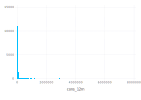

In [24]:
Gadfly.plot(trainingData, x= :cons_12m, Geom.histogram,
    Scale.y_continuous(format=:plain),
    Scale.x_continuous(format=:plain))

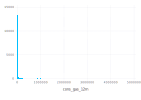

In [25]:
Gadfly.plot(trainingData, x= :cons_gas_12m, Geom.histogram,
    Scale.y_continuous(format=:plain),
    Scale.x_continuous(format=:plain))

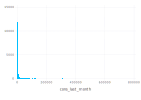

In [26]:
Gadfly.plot(trainingData, x= :cons_last_month, Geom.histogram,
    Scale.y_continuous(format=:plain),
    Scale.x_continuous(format=:plain))

The Consumation data seems to be a skewed data. we would be required to transform these values

Let's try to get the Skewness of all the columns of the training dataframe. 

In [27]:
# get the numeric column in each dataframe. 

numColTrainData = select(trainingData, findall(col -> eltype(col) <: Number, eachcol(trainingData)))

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
,Int64,Int64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Int64,Float64,Int64
1,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.6067,0.0,25.44,25.44,2,678.99,3,43.648,1
2,4660,0,0,189.95,0,0.0,16.27,0.145711,0.0,44.3114,0.0,16.38,16.38,1,18.89,6,13.8,0
3,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.3114,0.0,28.6,28.6,1,6.6,6,13.856,0
4,1584,0,0,240.04,0,0.0,19.83,0.146694,0.0,44.3114,0.0,30.22,30.22,1,25.46,6,13.2,0
5,4425,0,526,445.75,526,0.0,131.73,0.1169,0.100015,40.6067,52.32,44.91,44.91,1,47.98,6,19.8,0
6,8302,0,1998,796.94,1998,0.0,30.12,0.164775,0.086131,45.3084,181.21,33.12,33.12,1,118.89,4,13.2,1
7,45097,0,0,8069.28,0,0.0,0.0,0.166178,0.087538,44.3114,0.0,4.04,4.04,1,346.63,4,15.0,1
8,29552,0,1260,864.73,751,0.0,144.49,0.115174,0.098837,40.6067,70.63,53.92,53.92,1,100.09,6,26.4,0
9,2962,0,0,444.38,0,0.0,15.85,0.145711,0.0,44.3114,0.0,12.82,12.82,1,42.59,4,13.2,0


In [105]:
# getting the skewness of each numeric values

skewnessValues = Dict()
for name in names(numColTrainData)
    skew = skewness(numColTrainData[!,name])
    push!(skewnessValues, name => skew)
end

In [106]:
skewnessValues

Dict{Any, Any} with 18 entries:
  "cons_12m"                       => 5.99669
  "forecast_price_energy_off_peak" => -0.119574
  "churn"                          => 2.72044
  "margin_net_pow_ele"             => 4.47287
  "forecast_discount_energy"       => 5.15457
  "net_margin"                     => 36.5658
  "forecast_meter_rent_12m"        => 1.50499
  "pow_max"                        => 5.78619
  "forecast_price_pow_off_peak"    => -4.99826
  "margin_gross_pow_ele"           => 4.47217
  "cons_last_month"                => 6.39075
  "forecast_cons_12m"              => 7.15512
  "num_years_antig"                => 1.44607
  "nb_prod_act"                    => 8.63599
  "forecast_price_energy_peak"     => -0.01433
  "forecast_cons_year"             => 16.5863
  "imp_cons"                       => 13.1974
  "cons_gas_12m"                   => 9.59654

The values seems to be heavily skewed, hence during the feature engineering we would be do the apporiate transformations. 

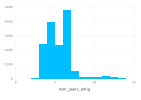

In [30]:
Gadfly.plot(trainingData, x= :num_years_antig, Geom.histogram,
    Scale.y_continuous(format=:plain),
    Scale.x_continuous(format=:plain))

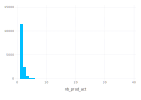

In [31]:
Gadfly.plot(trainingData, x= :nb_prod_act, Geom.histogram,
    Scale.y_continuous(format=:plain),
    Scale.x_continuous(format=:plain))

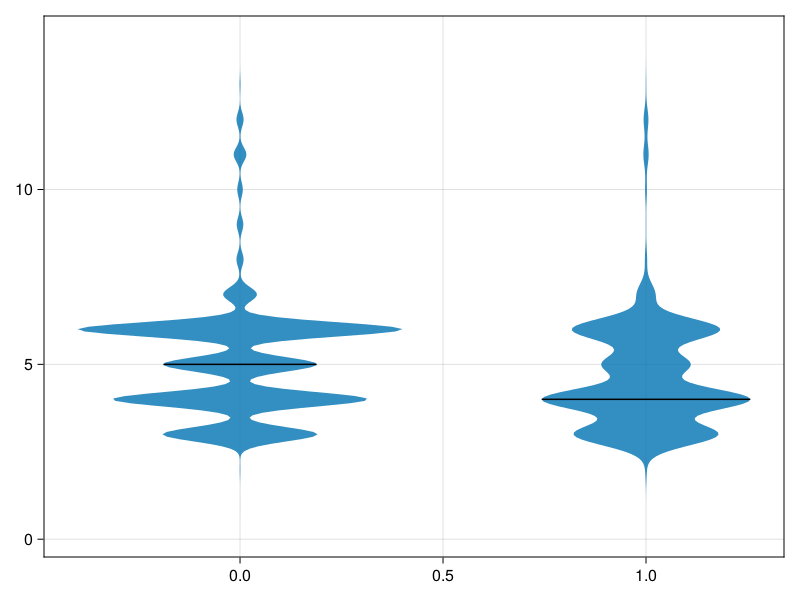

In [54]:
using CairoMakie

x = trainingData.churn 

y = trainingData.num_years_antig

CairoMakie.violin(x, y, show_median=true)

- The median year of a retained cutomer is 5 years. 
- The median year of a churned  cutomer is 4 years.

In [33]:
tsPriceData = @pipe groupby(pricingData, [:price_date]) |> combine(_ , findall(col -> eltype(col) <: Number, eachcol(pricingData)) .=> mean) 

,price_date,price_off_peak_var_mean,price_peak_var_mean,price_mid_peak_var_mean,price_off_peak_fix_mean,price_peak_fix_mean,price_mid_peak_fix_mean
,Date,Float64,Float64,Float64,Float64,Float64,Float64
1,2015-01-01,0.142568,0.0549504,0.0303326,43.2266,10.6929,6.45586
2,2015-02-01,0.142767,0.0550531,0.0303671,43.2382,10.6737,6.44902
3,2015-03-01,0.143104,0.0551181,0.0303964,43.254,10.6445,6.43012
4,2015-04-01,0.143259,0.0560346,0.0304918,43.2884,10.6473,6.42316
5,2015-05-01,0.143534,0.0553592,0.0303925,43.3154,10.6025,6.39081
6,2015-06-01,0.143731,0.0552553,0.0299023,43.3473,10.4158,6.2813
7,2015-07-01,0.143683,0.0553693,0.0306364,43.345,10.6422,6.42146
8,2015-08-01,0.137933,0.0536046,0.0307165,43.3654,10.6617,6.43152
9,2015-09-01,0.137933,0.0535323,0.030606,43.3519,10.603,6.39179


In [34]:
names(tsPriceData)

7-element Vector{String}:
 "price_date"
 "price_off_peak_var_mean"
 "price_peak_var_mean"
 "price_mid_peak_var_mean"
 "price_off_peak_fix_mean"
 "price_peak_fix_mean"
 "price_mid_peak_fix_mean"

#### The Energy prices

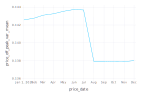

In [35]:
Gadfly.plot(tsPriceData, x= :price_date, y = :price_off_peak_var_mean, Geom.line,
    Scale.y_continuous(format=:plain))

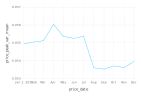

In [36]:
Gadfly.plot(tsPriceData, x= :price_date, y = :price_peak_var_mean, Geom.line,
    Scale.y_continuous(format=:plain))

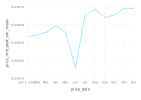

In [37]:
Gadfly.plot(tsPriceData, x= :price_date, y = :price_mid_peak_var_mean, Geom.line,
    Scale.y_continuous(format=:plain))

#### The power prices

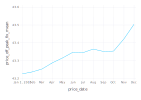

In [38]:
Gadfly.plot(tsPriceData, x= :price_date, y = :price_off_peak_fix_mean, Geom.line,
    Scale.y_continuous(format=:plain))

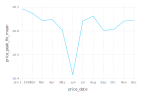

In [39]:
Gadfly.plot(tsPriceData, x= :price_date, y = :price_peak_fix_mean, Geom.line,
    Scale.y_continuous(format=:plain))

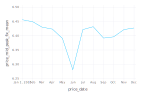

In [40]:
Gadfly.plot(tsPriceData, x= :price_date, y = :price_mid_peak_fix_mean, Geom.line,
    Scale.y_continuous(format=:plain))

The above graphs shows a sudden drop off after the month of July.  (write about graph)

### Hypothesis Testing 

We need to test whether the price has any effct on the churn of customer. 

In [74]:
groupedPriceData = @pipe groupby(pricingData, [ :id]) |> combine(_ , findall(col -> eltype(col) <: Number, eachcol(pricingData)) .=> mean) 

,id,price_off_peak_var_mean,price_peak_var_mean,price_mid_peak_var_mean,price_off_peak_fix_mean,price_peak_fix_mean,price_mid_peak_fix_mean
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,038af19179925da21a25619c5a24b745,0.14855,0.0,0.0,44.3558,0.0,0.0
2,31f2ce549924679a3cbb2d128ae9ea43,0.123027,0.102637,0.0735249,40.661,24.3966,16.2644
3,36b6352b4656216bfdb96f01e9a94b4e,0.118912,0.0983717,0.0689639,40.6339,24.3803,16.2535
4,48f3e6e86f7a8656b2c6b6ce2763055e,0.145552,0.0,0.0,44.4003,0.0,0.0
5,cce88c7d721430d8bd31f71ae686c91e,0.131729,0.112062,0.0820261,40.8549,24.596,16.4665
6,7363a2ebfbb3148c8ef6d25323e4093a,0.122945,0.10248,0.07322,40.6474,24.3885,16.259
7,ef716222bbd97a8bdfcbb831e3575560,0.149411,0.00712358,0.0,44.3558,0.0,0.0
8,92857f88c0e1c54124846d128eb73d36,0.149324,0.0,0.0,44.3558,0.0,0.0
9,1bbfa3a2744676a8aae9a9c3d0e7aeb1,0.149913,0.0,0.0,44.3706,0.0,0.0


In [76]:
groupedPriceDataC  = innerjoin(groupedPriceData, select(trainingData,[:id, :churn]), on =:id)

,id,price_off_peak_var_mean,price_peak_var_mean,price_mid_peak_var_mean,price_off_peak_fix_mean,price_peak_fix_mean,price_mid_peak_fix_mean,churn
,String,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,038af19179925da21a25619c5a24b745,0.14855,0.0,0.0,44.3558,0.0,0.0,0
2,31f2ce549924679a3cbb2d128ae9ea43,0.123027,0.102637,0.0735249,40.661,24.3966,16.2644,0
3,48f3e6e86f7a8656b2c6b6ce2763055e,0.145552,0.0,0.0,44.4003,0.0,0.0,0
4,7363a2ebfbb3148c8ef6d25323e4093a,0.122945,0.10248,0.07322,40.6474,24.3885,16.259,1
5,ef716222bbd97a8bdfcbb831e3575560,0.149411,0.00712358,0.0,44.3558,0.0,0.0,0
6,92857f88c0e1c54124846d128eb73d36,0.149324,0.0,0.0,44.3558,0.0,0.0,0
7,1bbfa3a2744676a8aae9a9c3d0e7aeb1,0.149913,0.0,0.0,44.3706,0.0,0.0,0
8,a63b235f48d0187cfe40b61d00226813,0.124493,0.104028,0.074768,40.6474,24.3885,16.259,0
9,d91f06c1290f68c585f6953aeaf1801c,0.124137,0.103748,0.0746347,40.661,24.3966,16.2644,0


because of the difference between the number of unique id's between pricing and training data column, we would be doing an inner join.

In [107]:
corrValues = Dict()

namesCol = names(groupedPriceDataC)
for name in namesCol
    if startswith(name, "p")
        corr = cor(groupedPriceDataC.churn, groupedPriceDataC[:,name])
         push!(corrValues, name => corr)
    else
        nothing
    end
end

In [108]:
corrValues

Dict{Any, Any} with 6 entries:
  "price_mid_peak_fix_mean" => 0.0448418
  "price_off_peak_var_mean" => -0.0064212
  "price_peak_var_mean"     => 0.0295882
  "price_mid_peak_var_mean" => 0.0465441
  "price_off_peak_fix_mean" => 0.0167997
  "price_peak_fix_mean"     => 0.0472404

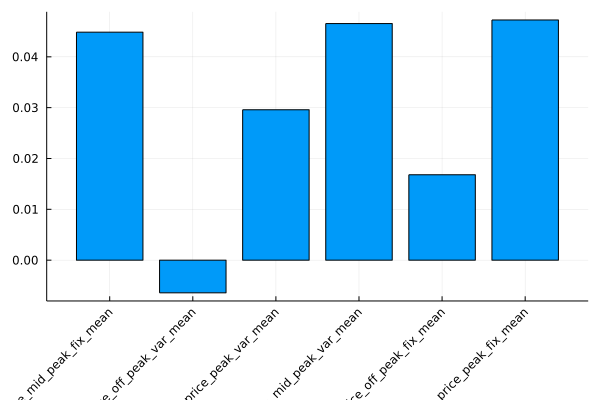

In [123]:
bar(collect(keys(corrValues)), collect(values(corrValues)), 
    legend = false, xrotation = 45)

There seems be a low (weak) correlation between the prices and the churn. Hence might need to get more creative in our feature creation method. 